# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Overview de Hong Kong

Como um dos principais centros financeiros internacionais, Hong Kong tem uma grande economia de serviço capitalista caracterizada pelo baixo nível de impostos e pelo livre comércio, sendo que a sua moeda, o dólar de Hong Kong, é a oitava mais negociada no mundo. 

Hong Kong tem várias boas colocações em classificações internacionais de vários temas. Por exemplo, sua liberdade e competitividade econômica e financeira, qualidade de vida, percepção de corrupção e Índice de Desenvolvimento Humano (IDH) estão todos classificados nas mais altas posições.

<center><img alt="Hong Kong vista do Victoria Peak em 2019" width="80%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Hong_Kong_Harbour_Night_2019-06-11.jpg/800px-Hong_Kong_Harbour_Night_2019-06-11.jpg"></center>


# Importando Pacotes

In [1]:
import os

In [2]:
os.chdir('../')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt

from folium.plugins import FastMarkerCluster
from src.visualization import visualize

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
listings = pd.read_parquet('data/silver/listings.parquet')

# EDA

### Quanto mais sentimento positivo, maior o preço?

Acionável:

A correlação de 0.0434 sugere uma relação muito fraca e quase inexistente entre o sentimento positivo nos comentários e o preço. 

Em termos práticos, isso indica que o sentimento positivo nas reviews não está fortemente relacionado ao preço dos imóveis.

Todavia, o cliente deve continuar a investir na qualidade do atendimento e na manutenção da satisfação do cliente, garantindo que as boas avaliações contribuam para a taxa de ocupação, mesmo que não diretamente no preço.

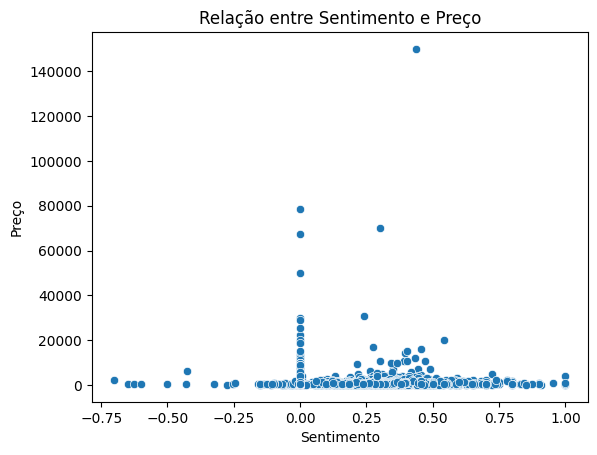

In [9]:
sns.scatterplot(x='sentiment', y='price', data=listings)
plt.title('Relação entre Sentimento e Preço')
plt.xlabel('Sentimento')
plt.ylabel('Preço')
plt.show()

### Quais áreas de Hong Kong apresentam maior concentração de avaliações positivas?

Acionável:

Foque em promover imóveis localizados em áreas com alta concentração de avaliações positivas, oferecendo preços competitivos e destacando essas regiões nas campanhas de marketing para atrair mais hóspedes.

In [15]:
location_positive_sentiment = listings.groupby(['latitude', 'longitude'])['is_positive_sentiment'].sum().reset_index()
map_sentiment = folium.Map(location=[listings['latitude'].mean(), listings['longitude'].mean()], zoom_start=12)


cluster_data = []
for index, row in location_positive_sentiment.iterrows():
    cluster_data.extend([[row['latitude'], row['longitude']]] * int(row['is_positive_sentiment']))
    
FastMarkerCluster(cluster_data).add_to(map_sentiment)
map_sentiment

### Anfitriões com mais listagens oferecem uma melhor experiência?

Acionável: Incentivar anfitriões com muitos anúncios a melhorar na qualidade do serviço.

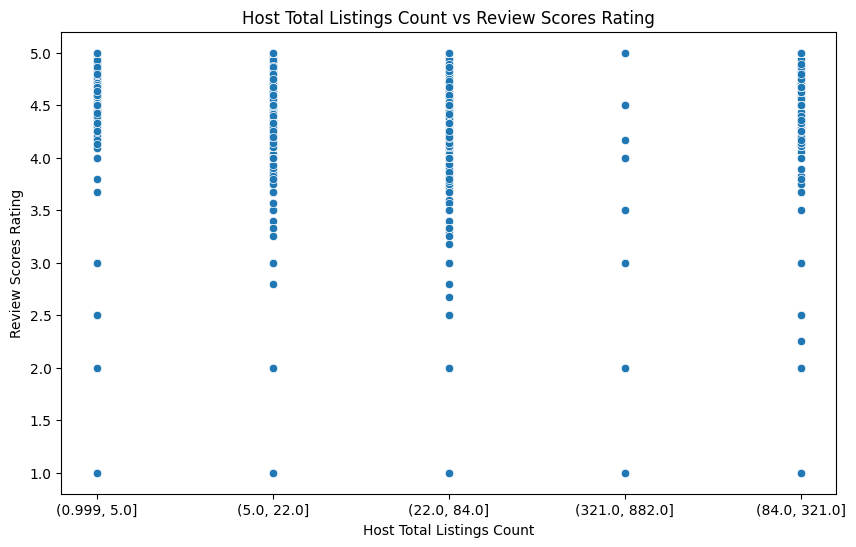

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=listings, x='host_listings_count_range', y='review_scores_rating')
plt.title('Host Total Listings Count vs Review Scores Rating')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Review Scores Rating')

# Exibindo o gráfico
plt.show()

### Quais fatores das avaliações impactam mais na satisfação geral dos hóspedes?

Acionável: 

`review_scores_rating`, está mais fortemente correlacionada com a review_scores_cleanliness (0.81) e a review_scores_checkin (0.71). 

Isso sugere que melhorar a limpeza e a experiência de check-in pode ter o maior impacto na satisfação geral dos hóspedes.

O cliente deve focar em estratégias para melhorar esses aspectos, pois eles têm uma influência significativa na avaliação geral.

In [8]:
listings[[
    'review_scores_rating','review_scores_cleanliness', 
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location'
]].corr()

,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
review_scores_rating,1.000000,0.811718,0.714083,0.705313,0.599639
review_scores_cleanliness,0.811718,1.000000,0.608818,0.592390,0.543843
review_scores_checkin,0.714083,0.608818,1.000000,0.739011,0.615380
review_scores_communication,0.705313,0.592390,0.739011,1.000000,0.583612
review_scores_location,0.599639,0.543843,0.615380,0.583612,1.000000


### Hosts que estão há mais tempo na plataforma tendem a ter mais número de reviews?

Acionável: Incentivar novos hosts a se manterem ativos por períodos mais longos e fornecer suporte contínuo para ajudar na retenção de hosts.

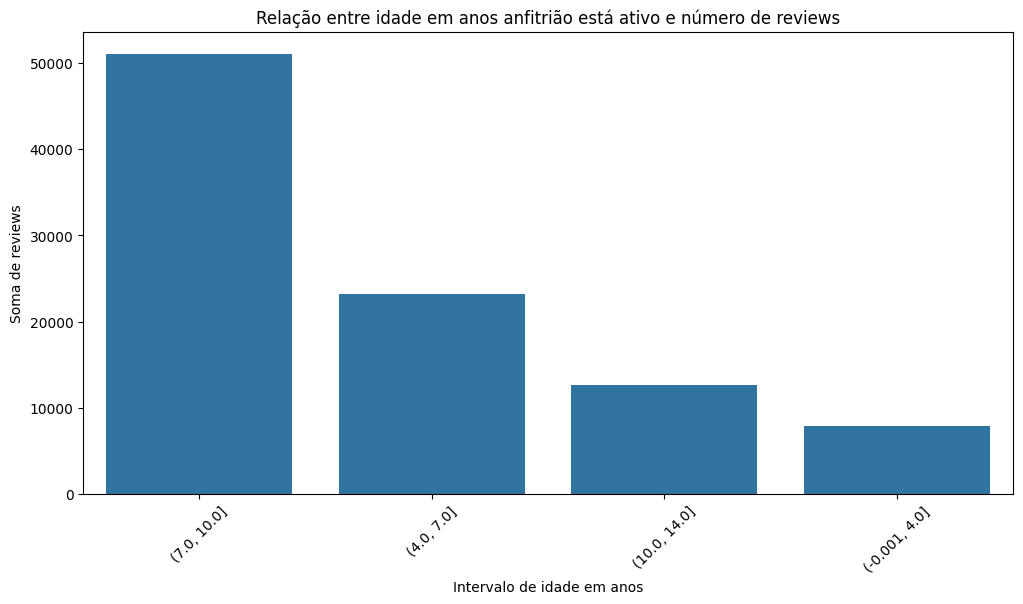

In [88]:
host_years_reviews = listings\
.groupby('host_years_active_range')\
['number_of_reviews'].sum()\
.reset_index()\
.nlargest(5, 'number_of_reviews')


visualize.plot_barplot(
    data=host_years_reviews, 
    x='host_years_active_range',
    y='number_of_reviews', 
    title='Relação entre idade em anos anfitrião está ativo e número de reviews', 
    xlabel='Intervalo de idade em anos', 
    ylabel='Soma de reviews'
)

# Clusterização

**Problema:** Identificar diferentes perfis de anfitriões com base em suas características e comportamento.

As melhores abordagens que serão consideradas na etapa de clusterização, são:

`K-prototypes`

Prós:

- Pode lidar com dados mistos, ou seja, dados que possuem tanto variáveis numéricas quanto categóricas.
- Permite uma interpretação direta dos resultados, pois associa os clusters a protótipos representativos.

Contras:

- É sensível à inicialização dos centroides, o que significa que resultados diferentes podem ser obtidos dependendo da escolha inicial.
- Pode ser computacionalmente caro em grandes conjuntos de dados e com muitas variáveis.


`K-modes`

Prós:

- Pode lidar com grandes conjuntos de dados e é relativamente rápido em comparação com outros algoritmos de clusterização.
- Não requer a definição do número de clusters a priori, pois o algoritmo determina automaticamente a estrutura de clusters.

Contras:

- Não lida bem com dados numéricos, pois não considera a distância entre os valores das variáveis categóricas.
- Pode ter dificuldade em lidar com dados esparsos ou com atributos com muitas categorias.